
## MNIST digit classification


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from random import randint
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Reading Mnist Small data set from google colab sample data sets

In [ ]:
data = pd.read_csv("sample_data/mnist_train_small.csv")

In [ ]:
data.shape

(19999, 785)

In [ ]:
data.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def show_image(pixels, label, axis):
    img = np.array(pixels).reshape((28,28))
    axis.set_title(label)
    img = axis.imshow(img, cmap='gray')
    return img

def show_random_data(dataset, target, no_of_images, no_of_rows):
  plot_image = 0
  fig, ax = plt.subplots(no_of_rows, 5, figsize=(20, 10))
  while(plot_image < no_of_images):
    image_no = randint(0,dataset.shape[0])
    show_image(data.iloc[image_no][0:], target.iloc[image_no],ax[int(plot_image/5)][int(plot_image%5)])
    plot_image = plot_image + 1
  plt.show()

Identifying the targer variable and removing it from the data set

In [ ]:
target = data.iloc[:,0]
data = data.drop(data.columns[0],axis=1)

# Image Visualization
Plotting images from the dataset. Variable no_of_images can be changed keeping in mind the minimum number of rows required in the subplots

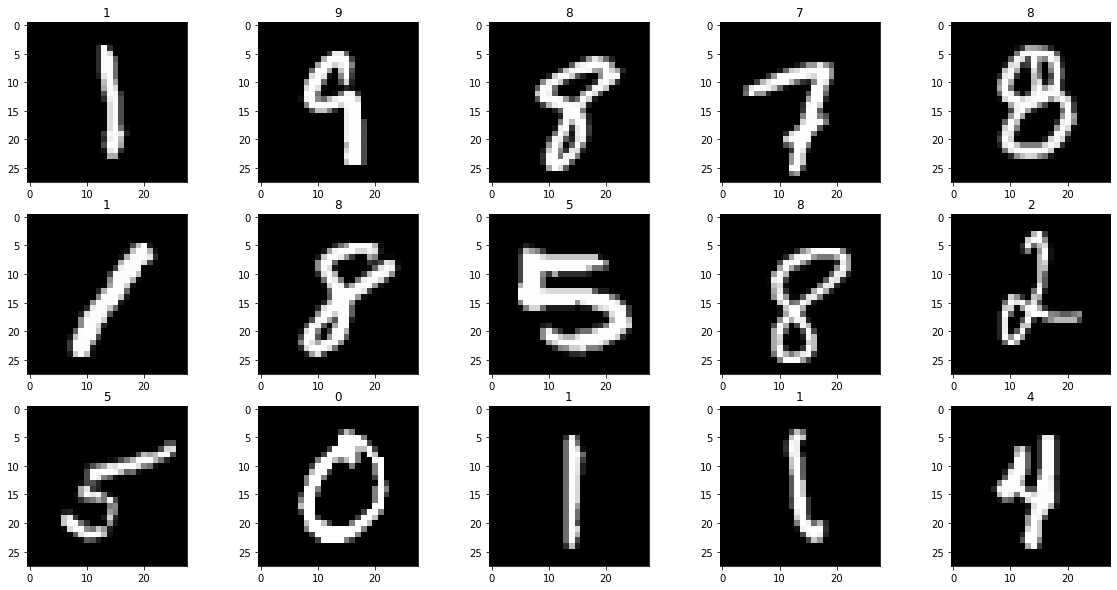

In [ ]:
show_random_data(data,target,15,3)

# Outliers Detection

In [ ]:
clf = IsolationForest(random_state=42, contamination=0.01).fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Visualizing outliers

In [ ]:
normal = clf.predict(data) == 1

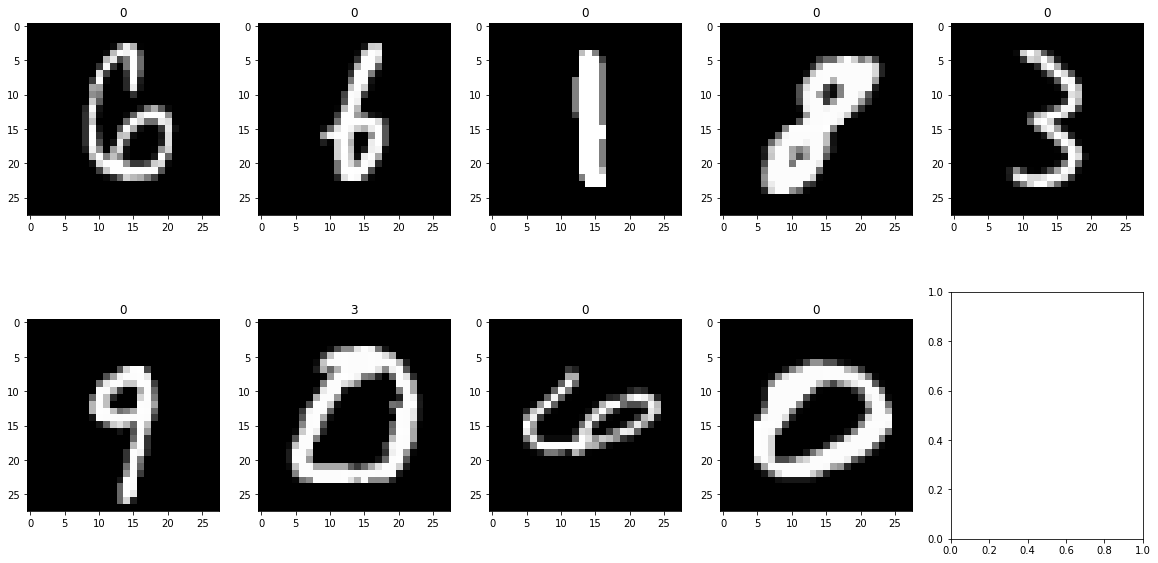

In [ ]:
show_random_data(data[normal == False],target[normal == False],9,2)

In [ ]:
print("Removing ",len(data[normal == False]),' rows from the dataset')

Removing  200  rows from the dataset


In [ ]:
data_cleaned = data[normal]
target_cleaned = target[normal]

# Dimensionality reduction

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
pca = PCA()
pca.fit(data_scaled)

PCA()

In [ ]:
features = [i for i in range(1,785)]
explained_rations = [r for r in np.cumsum(pca.explained_variance_ratio_)]
px.area(x=features, y=explained_rations)

In [ ]:
reduction = PCA(0.84)
reduced_data = reduction.fit_transform(data)

# Classification using SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    reduced_data, target, test_size=0.3, shuffle=False
)

In [ ]:
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma' : ['scale', 'auto']
}

#keeping cv low for quick processing
#C=10 obtained from Hyper parameter tuning not included here due to time issues
grid_search = GridSearchCV(
    SVC(C=10),
    param_grid,
    scoring='f1_weighted',
    verbose=2,
    cv=2
)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ............................gamma=scale, kernel=rbf; total time=   3.4s
[CV] END ............................gamma=scale, kernel=rbf; total time=   3.4s
[CV] END ...........................gamma=scale, kernel=poly; total time=   2.3s
[CV] END ...........................gamma=scale, kernel=poly; total time=   2.3s
[CV] END ........................gamma=scale, kernel=sigmoid; total time=   2.0s
[CV] END ........................gamma=scale, kernel=sigmoid; total time=   2.0s
[CV] END .............................gamma=auto, kernel=rbf; total time=  12.3s
[CV] END .............................gamma=auto, kernel=rbf; total time=  12.5s
[CV] END ............................gamma=auto, kernel=poly; total time=   3.1s
[CV] END ............................gamma=auto, kernel=poly; total time=   3.8s
[CV] END .........................gamma=auto, kernel=sigmoid; total time=   5.2s
[CV] END .........................gamma=auto, ker

GridSearchCV(cv=2, estimator=SVC(C=10),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=2)

In [ ]:
grid_search.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
predicted = grid_search.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {grid_search}:\n"
    f"{classification_report(y_test, predicted)}\n"
)

Classification report for classifier GridSearchCV(cv=2, estimator=SVC(C=10),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=2):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       0.99      0.99      0.99       704
           2       0.98      0.98      0.98       618
           3       0.97      0.97      0.97       594
           4       0.97      0.97      0.97       577
           5       0.98      0.97      0.97       528
           6       0.98      0.99      0.99       593
           7       0.98      0.98      0.98       642
           8       0.97      0.97      0.97       569
           9       0.96      0.95      0.96       609

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000


Text(0.5, 0.98, 'Confusion Matrix')

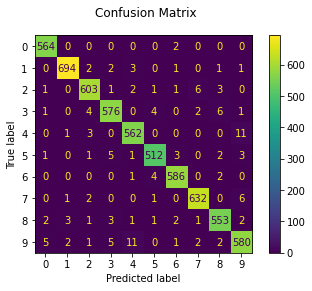

In [ ]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

# Pipeline Creation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.3, shuffle=False
)

In [ ]:
pipe = Pipeline([("Scaler",StandardScaler()),("pca",PCA(0.84)), ('svc',SVC(C=10,gamma='scale',kernel='rbf'))]).fit(X_train,y_train)

In [ ]:
pipe.score(X_test,y_test)

0.9633333333333334